# Stock Market Analysis 

In this notebook , we will use pandas to perform various financial analysis of stock data obtained from Yahoo Finance, visualize different aspects of it

In [1]:
# for data processing 
import pandas as pd 
import numpy as np 

In [2]:
# for data visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
# for date stamps 
from datetime import datetime

In [4]:
# for division
from __future__ import division

###  Getting and Visualizing Stock Data

Let's start by fetching the data from Yahoo Finance

In [5]:
# for reading stock data from yahoo
from pandas_datareader import data as pdr

In [6]:
# List of entertainmenent companies_stocks we going to use for analytics
stream_list = ['NFLX','FOXA','DIS']

In [7]:
data1 = pdr.get_data_yahoo("NFLX", start="2017-01-01", end="2018-01-30")

In [8]:
data1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,128.190002,124.309998,124.959999,127.489998,9437900,127.489998
2017-01-04,130.169998,126.550003,127.489998,129.410004,7843600,129.410004
2017-01-05,132.750000,128.899994,129.220001,131.809998,10185500,131.809998
2017-01-06,133.880005,129.809998,132.080002,131.070007,10657900,131.070007
2017-01-09,131.990005,129.889999,131.479996,130.949997,5766900,130.949997


In [9]:
data1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-24,261.709991,249.309998,250.880005,261.299988,17352400,261.299988
2018-01-25,272.299988,260.230011,263.000000,269.700012,15336400,269.700012
2018-01-26,274.600006,268.760010,271.489990,274.600006,11021800,274.600006
2018-01-29,286.809998,273.920013,274.200012,284.589996,17529700,284.589996
2018-01-30,282.730011,272.700012,277.000000,278.799988,12482900,278.799988


In [10]:
# general info 
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 271 entries, 2017-01-03 to 2018-01-30
Data columns (total 6 columns):
High         271 non-null float64
Low          271 non-null float64
Open         271 non-null float64
Close        271 non-null float64
Volume       271 non-null int64
Adj Close    271 non-null float64
dtypes: float64(5), int64(1)
memory usage: 14.8 KB


In [11]:
data1.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [12]:
# summary stats for NFLX stock 
data1.describe()

,High,Low,Open,Close,Volume,Adj Close
count,271.000000,271.000000,271.000000,271.000000,2.710000e+02,271.000000
mean,171.913358,168.109779,170.076384,170.220332,6.939440e+06,170.220332
std,28.023742,26.881971,27.272838,27.736317,4.406568e+06,27.736317
min,128.190002,124.309998,124.959999,127.489998,2.160500e+06,127.489998
25%,146.375000,143.945000,145.474998,145.139999,4.598900e+06,145.139999
50%,168.669998,164.729996,166.119995,165.949997,5.677400e+06,165.949997
75%,190.580002,186.394997,188.544998,188.579994,7.558300e+06,188.579994
max,286.809998,273.920013,277.000000,284.589996,4.158740e+07,284.589996


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the netflix stocks.

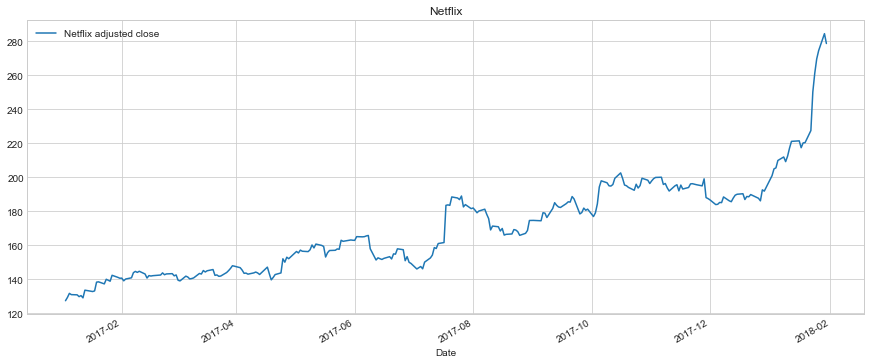

In [13]:
# Plot the adjusted closing price of NFLX
data1['Adj Close'].plot(legend = True , figsize = (15, 6), title = 'Netflix' , label= 'Netflix adjusted close')


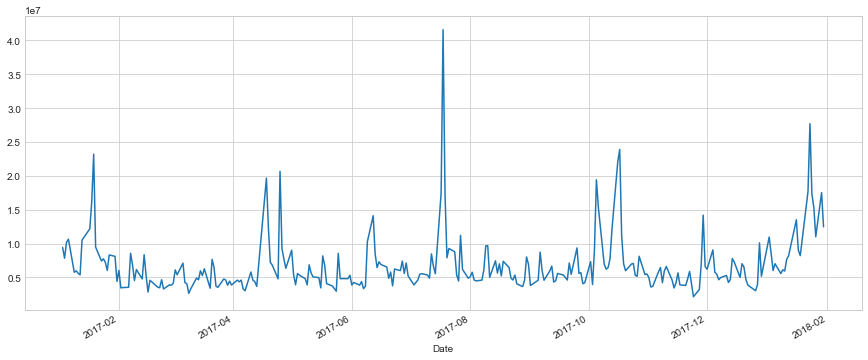

In [14]:
# plot the volume of stock being traded each day over the year
data1['Volume'].plot(figsize = (15.0,6.0))

 we can see on july 2017 was the higher for netflix stock being traded

### Simple Moving average 
The moving average of a stock will give you a sense of the performance of a stock over a given time-period
 As price moves higher, the moving average line will also slope upwards and vice versa to slope downwards when price is falling. The close refers to the closing price of the specified time period interval. The simple moving average (SMA) formula is:
SMA = (Total Sum of Closing Prices)/Total Number of Closes

In [15]:
# moving average for forcasting stock behavior 
days = [10, 20, 50, 100]
for DA in days :
    column_name = 'MA for %s days' %(str(DA))
    data1[column_name]= data1['Adj Close'] .rolling(window =  DA).mean()

In [16]:
data1.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2017-01-03,128.190002,124.309998,124.959999,127.489998,9437900,127.489998,NaN,NaN,NaN,NaN
2017-01-04,130.169998,126.550003,127.489998,129.410004,7843600,129.410004,NaN,NaN,NaN,NaN
2017-01-05,132.750000,128.899994,129.220001,131.809998,10185500,131.809998,NaN,NaN,NaN,NaN
2017-01-06,133.880005,129.809998,132.080002,131.070007,10657900,131.070007,NaN,NaN,NaN,NaN
2017-01-09,131.990005,129.889999,131.479996,130.949997,5766900,130.949997,NaN,NaN,NaN,NaN


In [17]:
data1.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2018-01-24,261.709991,249.309998,250.880005,261.299988,17352400,261.299988,226.998000,213.587502,199.723401,194.5201
2018-01-25,272.299988,260.230011,263.000000,269.700012,15336400,269.700012,232.716000,217.684502,201.277001,195.4700
2018-01-26,274.600006,268.760010,271.489990,274.600006,11021800,274.600006,238.452000,222.102502,202.867401,196.4686
2018-01-29,286.809998,273.920013,274.200012,284.589996,17529700,284.589996,244.788000,226.696502,204.645001,197.5693
2018-01-30,282.730011,272.700012,277.000000,278.799988,12482900,278.799988,250.514999,231.038501,206.378600,198.5648


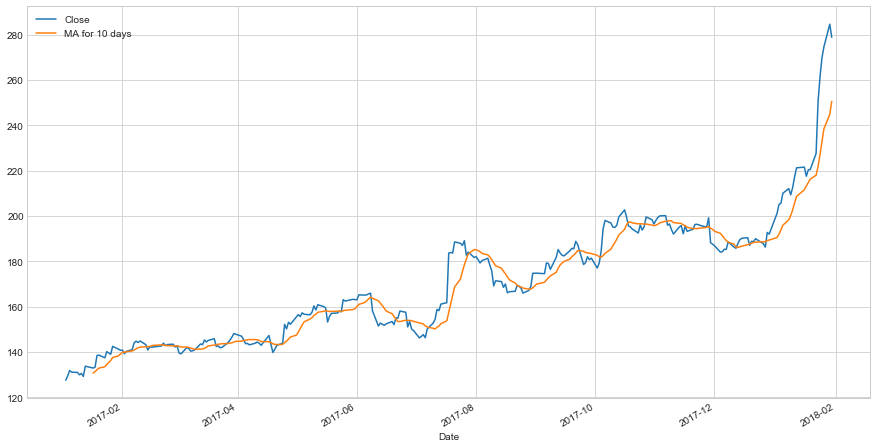

In [18]:
# plot the moving average for NFLX over 10 days
data1[['Close','MA for 10 days']].plot(legend = True, figsize = (15.1,8.0))

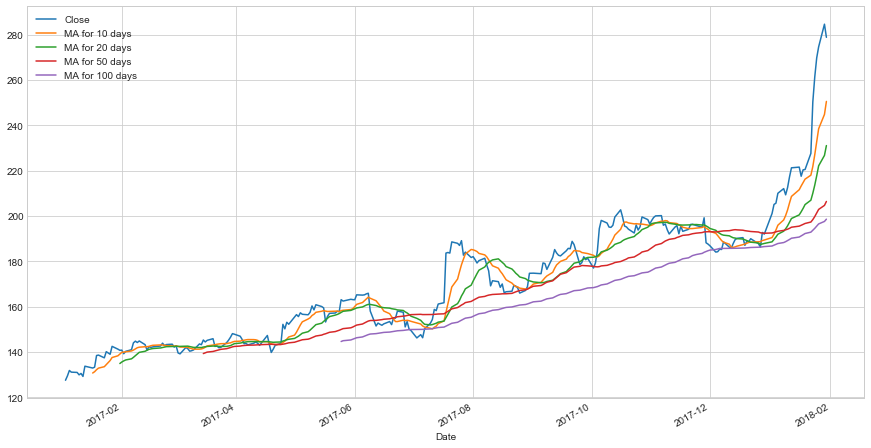

In [19]:
# plot the moving average over different windows of time 
data1[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(15,8))


### Candelstick chart

In [32]:
# Create the candelstick chart
from bokeh.plotting import figure, show, output_file

In [33]:
from math import pi
from bokeh.io import output_notebook

In [34]:
inc = data1.Close > data1.Open
dec = data1.Open > data1.Close
w = 12*60*60*1000 #half day in milliseconds

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, title="NFLX Candlestick")
p.xaxis.major_label_orientation = pi / 4
p.grid.grid_line_alpha=0.3

p.segment(data1.index, data1.High, data1.index, data1.Low, color="black")
p.vbar(data1.index[inc], w, data1.Open[inc], data1.Close[inc], color="#32CD32", line_color="green")
p.vbar(data1.index[dec], w, data1.Open[dec], data1.Close[dec], color="#FF4500", line_color="red")

output_file("candlestick_NFLX.html", title="candlestick_NFLX.py example")

In [35]:
output_notebook()

Loading BokehJS ...

In [36]:
show(p)

With a candlestick chart, a green candlestick indicates a day where the closing price was higher than the open (a gain), while a red candlestick indicates a day where the open was higher than the close (a loss).

###  Daily Returns :

In [20]:
# daily returns 
data1['Daily Return'] = data1['Close'].pct_change() 

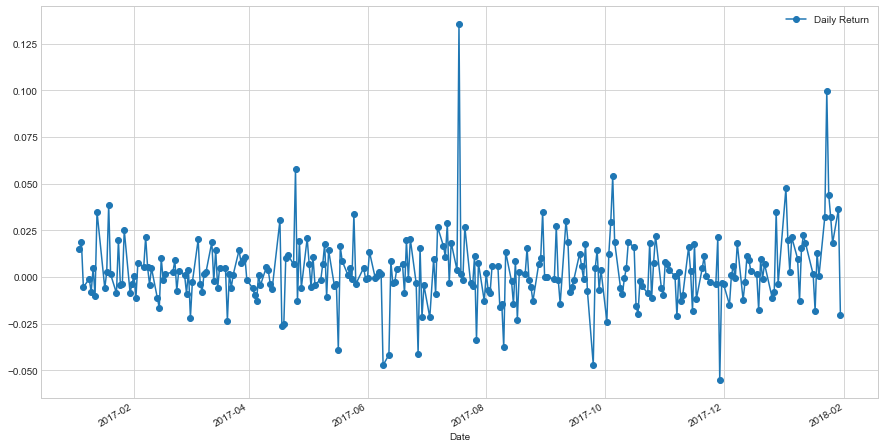

In [21]:
data1['Daily Return'].plot(legend = True , figsize = (15,8), marker = 'o')

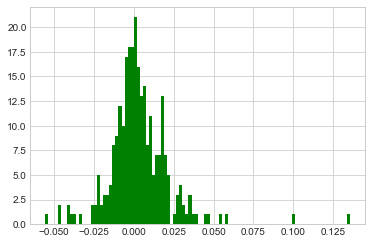

In [22]:
data1['Daily Return'].hist(bins=100 , color = 'g')

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


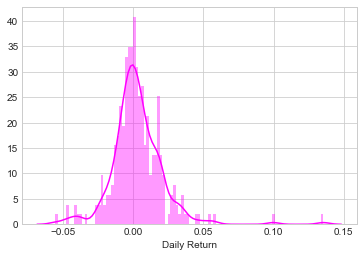

In [23]:
sns.distplot(data1['Daily Return'].dropna(),bins = 100, color = 'magenta')

To analyze the returns of all the stocks in our list we need to build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [24]:
closing_priceDF = pdr.get_data_yahoo(stream_list, start="2017-01-01", end="2018-01-30")

In [25]:
data_all = closing_priceDF['Close']

In [26]:
closing_priceDF['Close'].head()

Symbols,DIS,FOXA,NFLX
Date,,,
2017-01-03,106.080002,28.719999,127.489998
2017-01-04,107.440002,29.020000,129.410004
2017-01-05,107.379997,29.000000,131.809998
2017-01-06,108.980003,29.520000,131.070007
2017-01-09,108.360001,29.469999,130.949997


In [27]:
closing_priceDF['Close'].tail()

Symbols,DIS,FOXA,NFLX
Date,,,
2018-01-24,110.500000,38.000000,261.299988
2018-01-25,110.550003,38.180000,269.700012
2018-01-26,112.190002,38.810001,274.600006
2018-01-29,111.540001,38.740002,284.589996
2018-01-30,110.110001,38.459999,278.799988


Now let's perform a graphical comparaison for the closing price for all companies

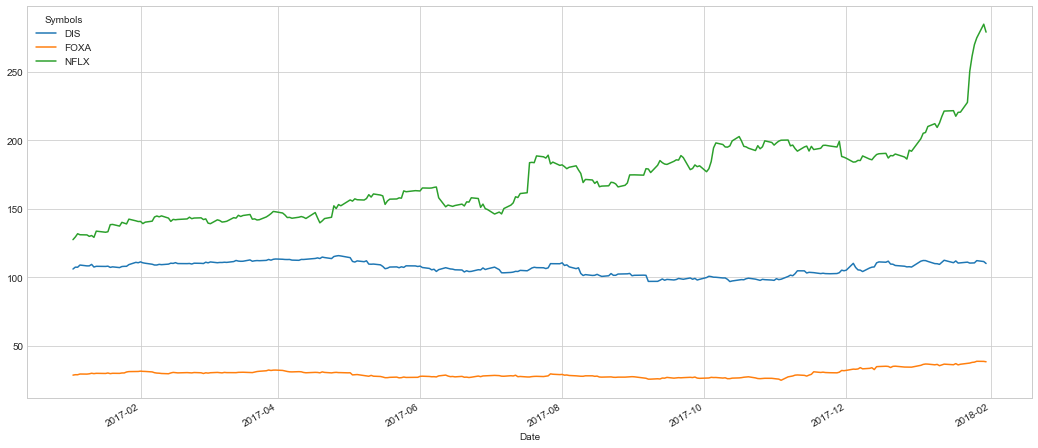

In [28]:
data_all[['DIS', 'FOXA','NFLX']].plot(figsize = (18,8))

In [29]:
stream_returns = closing_priceDF.pct_change()

In [30]:
stream_returns['Close'].head()

Symbols,DIS,FOXA,NFLX
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,0.012821,0.010446,0.015060
2017-01-05,-0.000558,-0.000689,0.018546
2017-01-06,0.014900,0.017931,-0.005614
2017-01-09,-0.005689,-0.001694,-0.000916


In [31]:
data1.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-22',
               '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26',
               '2018-01-29', '2018-01-30'],
              dtype='datetime64[ns]', name='Date', length=271, freq=None)

In [37]:
# cumulative daily returns 
data_all.head()

Symbols,DIS,FOXA,NFLX
Date,,,
2017-01-03,106.080002,28.719999,127.489998
2017-01-04,107.440002,29.020000,129.410004
2017-01-05,107.379997,29.000000,131.809998
2017-01-06,108.980003,29.520000,131.070007
2017-01-09,108.360001,29.469999,130.949997


### Daily percentage change

In [38]:
daily_pct =  data_all.pct_change()

In [39]:
daily_pct.head()

Symbols,DIS,FOXA,NFLX
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,0.012821,0.010446,0.015060
2017-01-05,-0.000558,-0.000689,0.018546
2017-01-06,0.014900,0.017931,-0.005614
2017-01-09,-0.005689,-0.001694,-0.000916


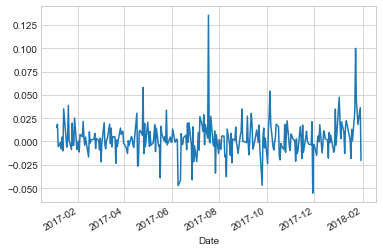

In [40]:
daily_pct["NFLX"].plot()

the plot of daily percentage change will tend to look like noise, however, when we use the cumulative product of these values, known as the daily cumulative return, it is possible to see how the value of the stock changes over time.

In [41]:
daily_cr = (1 + daily_pct).cumprod()

In [42]:
daily_cr.head()

Symbols,DIS,FOXA,NFLX
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,1.012821,1.010446,1.015060
2017-01-05,1.012255,1.009749,1.033885
2017-01-06,1.027338,1.027855,1.028081
2017-01-09,1.021493,1.026114,1.027139


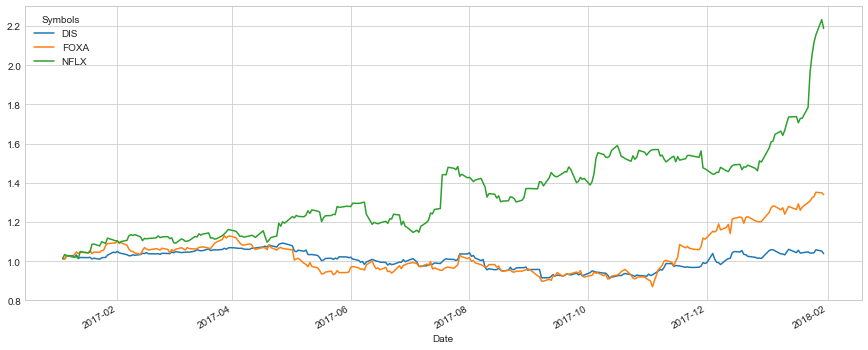

In [43]:
# plt all the cumulative returns to get an idea of all the relative performance of all the stocks
daily_cr.plot(figsize = (15, 6))

In [44]:
# reshape from daily to monthly 
monthly = data_all.asfreq('M').ffill()

In [45]:
monthly.head()

Symbols,DIS,FOXA,NFLX
Date,,,
2017-01-31,110.650002,31.379999,140.710007
2017-02-28,110.089996,29.920000,142.130005
2017-03-31,113.389999,32.389999,147.809998
2017-04-30,113.389999,32.389999,147.809998
2017-05-31,107.940002,27.120001,163.070007


In [46]:
# calculate the monthly percentage changes
monthly_pct = monthly.pct_change()

In [47]:
monthly_pct.head()

Symbols,DIS,FOXA,NFLX
Date,,,
2017-01-31,NaN,NaN,NaN
2017-02-28,-0.005061,-0.046526,0.010092
2017-03-31,0.029976,0.082553,0.039963
2017-04-30,0.000000,0.000000,0.000000
2017-05-31,-0.048064,-0.162704,0.103241


In [48]:
# calculate the monthly cumulative returns
monthly_cr = (1 + monthly_pct).cumprod()

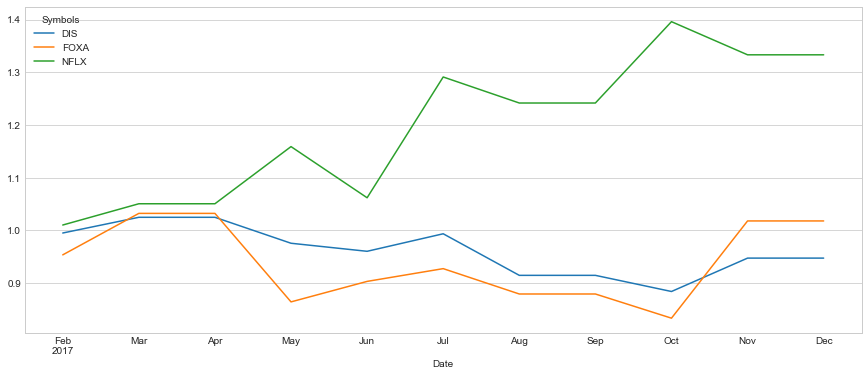

In [49]:
# plot the monthly cumulative returns
monthly_cr.plot(figsize = (15,6))

### Analyzing distribution of returns

Let's analyze distribution of returns :

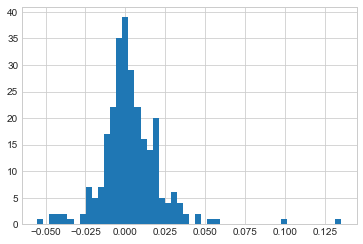

In [50]:
daily_pct["NFLX"].hist(bins = 50)

This visualization tells us several things. First, most of the daily movements center around0.0.

Second, there is a small amount of skew to the left, but the data appears relatively symmetric.
We can plot the histograms of the daily percentage change for all the stocks in a single histogram matrix plot. This gives us a means to quickly determine the differences in stock
behavior over the year.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12188250>,
      dtype=object)

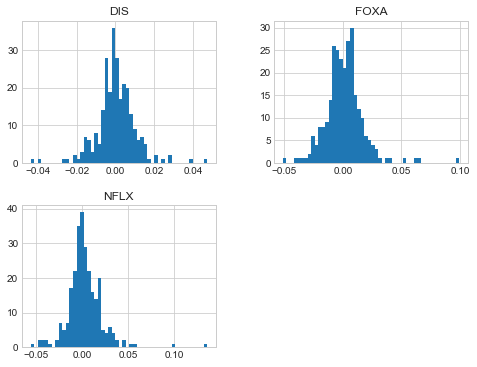

In [51]:
daily_pct.hist(bins = 50, figsize = (8,6))

From this chart, the difference in the performances of these 3 stocks can be seen,particularly, the skewedness (more exceptional values on one side of the mean). We can also see the difference in the overall distribution widths, which gives a quick view of stocks that are more or less volatile.

Comparison of average daily returns across stocks : 
The following graphs the
relationship of the daily percentage change in the closing price between NFLX and FOXA :

### Correlation of stocks

In [52]:
correlation = daily_pct.corr()

In [53]:
correlation

Symbols,DIS,FOXA,NFLX
Symbols,,,
DIS,1.000000,0.577136,0.028143
FOXA,0.577136,1.000000,0.001154
NFLX,0.028143,0.001154,1.000000


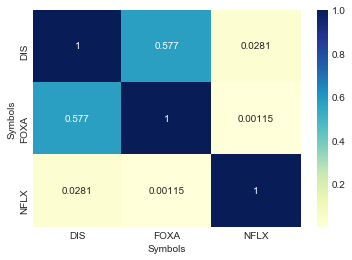

In [54]:
sns.heatmap(correlation,annot=True,fmt=".3g",cmap='YlGnBu')

### The volatility of  stocks

In [55]:
# calculating volatolity  

The volatility of a stock is a measurement of the amount of change of variance in the price
of a stock over a specific time-period. It is common to compare the volatility of a stock to
another stock to get a feel for which may have less risk. Generally, the higher the volatility, the riskier the
investment is in that stock.

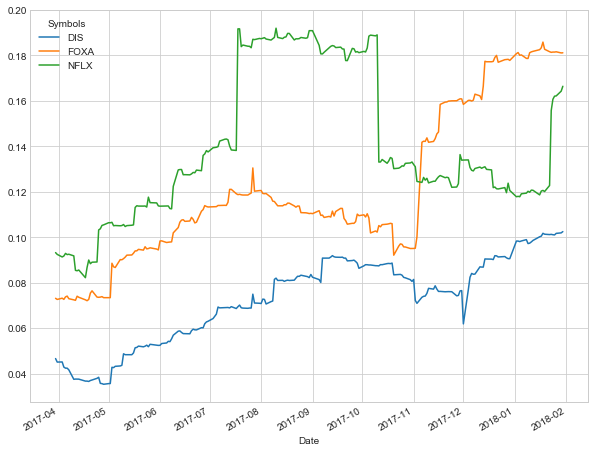

In [56]:
vol = daily_pct.rolling(window = 60).std() * np.sqrt(60)
vol.plot(figsize  = (10,8))

Lines higher on the chart represent overall higher volatility, and the change of volatility
over time is shown as movement in each line.

Determining risk relative to expected returns
A useful analysis is to relate the volatility of a stock's daily percentage change to its
expected return. This gives a feel for the risk/return ratio of the investment in the stock. This
can be calculated by mapping the mean of the daily percentage change relative to the
standard deviation of the same values.

### Risk relative to expected returns

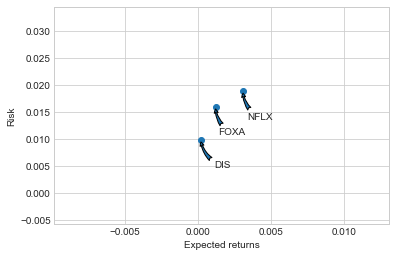

In [57]:
plt.scatter(daily_pct.mean(),daily_pct.std())

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots using annotations 
for label, x, y in zip(daily_pct.columns, daily_pct.mean(), daily_pct.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

Among the things we can notice regarding the risk is :
- netflix and fox stocks are the highest risk but also have the highest returns
- disney is the most conservative of the three 
